In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dna-sequence-dataset/dog.txt
/kaggle/input/dna-sequence-dataset/example_dna.fa
/kaggle/input/dna-sequence-dataset/human.txt
/kaggle/input/dna-sequence-dataset/chimpanzee.txt


In [ ]:
with open ('/kaggle/input/dna-sequence-dataset/chimpanzee.txt', 'r') as file:
    dna = file.read()

dna[:100]

'sequence\tclass\nATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATAT'

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.0 MB/s eta 0:00:00a 0:00:01


In [ ]:
len(dna)

3258260

In [ ]:
from Bio import Seq


print(len(dna))
print(dna.count('A'))
print(dna.count('T'))
print(dna.count('G'))
print(dna.count('C'))

3258260
829440
724689
846118
852790


In [ ]:
gc = dna.count('G') + dna.count('C')
print((gc/len(dna))*100)

52.141572495749266


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
base_counts = Counter(dna)
base_counts

Counter({'s': 3,
         'e': 3,
         'q': 1,
         'u': 1,
         'n': 1,
         'c': 2,
         '\t': 1683,
         'l': 1,
         'a': 1,
         '\n': 1682,
         'A': 829440,
         'T': 724689,
         'G': 846118,
         'C': 852790,
         '4': 261,
         '6': 521,
         '0': 234,
         '1': 185,
         '3': 228,
         '2': 144,
         '5': 109,
         'N': 163})

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


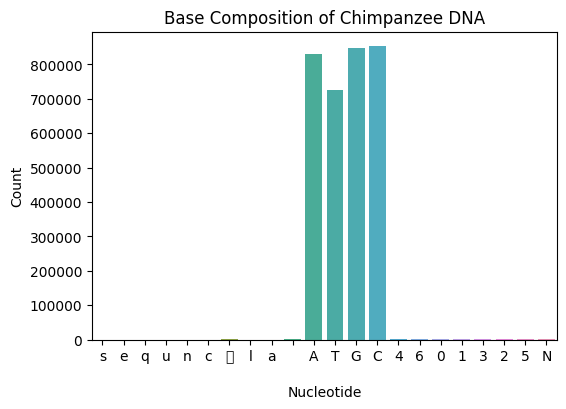

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=list(base_counts.keys()), y=list(base_counts.values()))
plt.title("Base Composition of Chimpanzee DNA")
plt.xlabel("Nucleotide")
plt.ylabel("Count")
plt.show()


In [ ]:
def get_kmers(sequence, k=4):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

kmers_4 = get_kmers(dna, k=4)
kmers_counts = Counter(kmers_4)

print("Top 10 most frequent 4-mers:")
print(kmers_counts.most_common(10))

Top 10 most frequent 4-mers:
[('CCTG', 30136), ('CTGG', 29987), ('GCTG', 29353), ('CAGC', 29081), ('CCAG', 28396), ('TGGA', 27310), ('GGAG', 26410), ('AGAA', 26322), ('CTGC', 26059), ('GAAG', 26045)]


In [ ]:
with open ('/kaggle/input/dna-sequence-dataset/dog.txt', 'r') as file:
    dna1 = file.read()

dna1[:100]

'sequence\tclass\nATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAATATTTCTCACCCTCTTCATCCTATTTCAACTAAAAATTT'

In [ ]:
print(len(dna1))
print(dna1.count('A'))
print(dna1.count('T'))
print(dna1.count('G'))
print(dna1.count('C'))

1667375
414741
363105
439921
446902


In [ ]:
gc1 = dna1.count('G') + dna1.count('C')
print((gc1/len(dna1))*100)

53.186775620361345


In [ ]:
base_counts1 = Counter(dna1)
base_counts1

Counter({'s': 3,
         'e': 3,
         'q': 1,
         'u': 1,
         'n': 1,
         'c': 2,
         '\t': 821,
         'l': 1,
         'a': 1,
         '\n': 820,
         'A': 414741,
         'T': 363105,
         'G': 439921,
         'C': 446902,
         '4': 135,
         '6': 260,
         '0': 131,
         '3': 95,
         'N': 232,
         '2': 64,
         '5': 60,
         '1': 75})

In [ ]:
def get_kmers1(sequence, k=4):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

kmers_1 = get_kmers1(dna1, k=4)
kmers_counts1 = Counter(kmers_1)

print("Top 10 most frequent 4-mers:")
print(kmers_counts1.most_common(10))

Top 10 most frequent 4-mers:
[('CCTG', 15722), ('CTGG', 15582), ('GCTG', 15291), ('CAGC', 15044), ('CCAG', 14811), ('GGAG', 13956), ('TGGA', 13821), ('CTGC', 13730), ('GAAG', 13395), ('AGAA', 13026)]


In [ ]:
dog_dna = "/kaggle/input/dna-sequence-dataset/dog.txt"

dog_kmers = get_kmers1(dna1, k=4)
dog_kmer_counts = Counter(kmers_1)

chimp_kmer_set = set(kmers_4)
dog_kmer_set = set(kmers_1)

common_kmers = chimp_kmer_set & dog_kmer_set
unique_to_dog = dog_kmer_set - chimp_kmer_set

print("Common 4-mers:", list(common_kmers))
print("Unique to dog:", list(unique_to_dog))


Common 4-mers: ['TCAT', '0\nTG', 'AGCC', 'CAAA', 'TTGT', 'CAGC', 'ACAC', 'CTAA', 'GTAA', 'AG\t3', 'ATGA', '\t6\nT', '\nATA', 'TAGA', 'CTGC', 'GCCC', 'TAAC', 'ACCC', 'CC\t6', 'GTTA', 'ATAC', 'GTGC', 'CAGA', 'TCCG', 'ATAA', 'TATA', 'AAAG', '\t4\nG', 'GCGG', 'GTAT', 'GTTT', 'TGCT', 'ATCA', 'GACT', 'AGAG', 'ATCT', '6\nAG', '\nAGC', 'GGCC', 'GTTC', 'lass', '\nTCG', 'TACT', 'ACAG', 'CATG', 'ACTG', '2\nAG', '\nTGC', '\nGGA', 'AGCG', '\t6\nC', 'GATT', '\t1\nC', 'AA\t5', 'AGCT', '0\nAT', 'ATTC', 'TTGC', 'TTCC', 'ACAA', 'AG\t0', 'ACTC', 'CAAG', 'GA\t4', 'CCTA', '\nCAC', 'GTTG', 'CCGC', '\t0\nA', '\nCTA', 's\nAT', 'AGTC', 'CGGG', '4\nAT', 'CGGA', 'ACTT', 'CTTA', 'CCTC', 'TGGT', '\nTGT', '\t3\nA', 'GGTG', 'GGGG', 'TGCG', 'eque', 'CCGT', 'CCCT', '\nAGT', 'TCGC', 'AA\t1', '\nTCT', '\nACA', 'TGA\t', 'GCTG', '\nATG', 'GAAG', 'TCTG', 'ACCT', 'A\t0\n', 'GGCA', 'uenc', 'GCTA', 'GGGA', 'GTCA', '\nGAA', '\nAAG', 'CGGT', '\t4\nT', '\nATT', 'TAGT', 'TCGG', 'GAGT', 'AGTG', 'TAAT', 'AACC', 'GTCG', '\nGAT', '6\

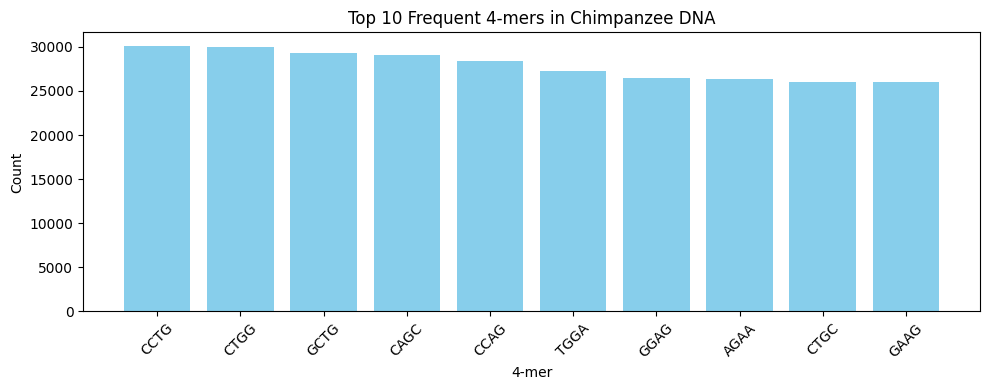

In [ ]:

top_kmers = kmers_counts.most_common(10)
labels, values = zip(*top_kmers)

plt.figure(figsize=(10, 4))
plt.bar(labels, values, color='skyblue')
plt.title("Top 10 Frequent 4-mers in Chimpanzee DNA")
plt.xlabel("4-mer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


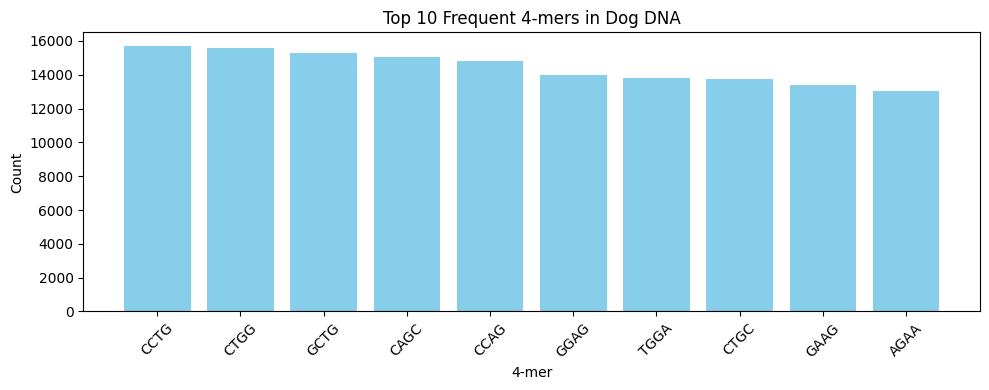

In [ ]:

top_kmers = kmers_counts1.most_common(10)
labels, values = zip(*top_kmers)

plt.figure(figsize=(10, 4))
plt.bar(labels, values, color='skyblue')
plt.title("Top 10 Frequent 4-mers in Dog DNA")
plt.xlabel("4-mer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from difflib import SequenceMatcher


matcher = SequenceMatcher(None, dna, dna1)
similarity = matcher.ratio()
print(f"Similarity between chimpanzee and dog sample: {similarity*100:.2f}%")


Similarity between chimpanzee and dog sample: 0.02%


In [ ]:
data = pd.read_table('../input/dna-sequence-dataset/chimpanzee.txt')
data

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6
...,...,...
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3


In [ ]:
data['class'].value_counts()

class
6    521
4    261
0    234
3    228
1    185
2    144
5    109
Name: count, dtype: int64

In [ ]:
data.sequence[0]

'ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG'

# Kmers

In [ ]:
def get_kmers(sequence, size=6):
    return [''.join(sequence[x:x+size]) for x in range(len(sequence) - size + 1)]

data['kmers'] = data['sequence'].apply(lambda x: ' '.join(get_kmers(x)))

In [ ]:
data['kmers']

0       ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1       ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2       ATGGCC TGGCCT GGCCTC GCCTCG CCTCGC CTCGCG TCGC...
3       ATGGCC TGGCCT GGCCTC GCCTCG CCTCGC CTCGCG TCGC...
4       ATGGGC TGGGCA GGGCAG GGCAGC GCAGCG CAGCGC AGCG...
                              ...                        
1677    ATGCTG TGCTGA GCTGAG CTGAGC TGAGCG GAGCGG AGCG...
1678    ATGCTG TGCTGA GCTGAG CTGAGC TGAGCG GAGCGG AGCG...
1679    ATGAAG TGAAGC GAAGCG AAGCGA AGCGAC GCGACC CGAC...
1680    ATGACT TGACTG GACTGG ACTGGA CTGGAA TGGAAC GGAA...
1681    ATGTTG TGTTGC GTTGCC TTGCCC TGCCCA GCCCAG CCCA...
Name: kmers, Length: 1682, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['kmers'])
y = data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

In [ ]:
y_pred = model1.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73        28
           1       0.97      0.77      0.86        39
           2       0.96      0.89      0.92        27
           3       1.00      0.84      0.91        43
           4       0.88      0.73      0.80        52
           5       1.00      0.62      0.77        29
           6       0.77      0.98      0.86       119

    accuracy                           0.85       337
   macro avg       0.90      0.80      0.84       337
weighted avg       0.87      0.85      0.84       337



In [ ]:
###

##  HMM

In [ ]:
# Install required packages
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 4.3 MB/s eta 0:00:0000:01


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from hmmlearn import hmm  # For HMM

# Define the paths to the data files
human_data_path = '/kaggle/input/dna-sequence-dataset/human.txt'
dog_data_path = '/kaggle/input/dna-sequence-dataset/dog.txt'
chimpanzee_data_path = '/kaggle/input/dna-sequence-dataset/chimpanzee.txt'

# Load the data
def load_data(file_path):
    try:
        df = pd.read_csv(file_path, sep='\t', header=0)
        return df
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

human_data = load_data(human_data_path)
dog_data = load_data(dog_data_path)
chimpanzee_data = load_data(chimpanzee_data_path)

# Check if dataframes are loaded properly before proceeding
if human_data is None or dog_data is None or chimpanzee_data is None:
    exit()  # Stop execution if any dataframe failed to load


# Display the first few rows of each DataFrame and their info
print("Human Data Head:")
print(human_data.head())
print("\nHuman Data Info:")
human_data.info()

print("\nDog Data Head:")
print(dog_data.head())
print("\nDog Data Info:")
dog_data.info()

print("\nChimpanzee Data Head:")
print(chimpanzee_data.head())
print("\nChimpanzee Data Info:")
chimpanzee_data.info()

# Function to convert sequence to numerical values
def sequence_to_numerical(sequence):
    sequence = sequence.upper()  # Ensure all bases are uppercase
    mapping = {'A': 0, 'T': 1, 'G': 2, 'C': 3}
    numerical_sequence = [mapping.get(base, 0) for base in sequence]  # Map unknown bases to 0
    return numerical_sequence

# Apply the conversion to the 'sequence' column for each DataFrame
human_data['numerical_sequence'] = human_data['sequence'].apply(sequence_to_numerical)
dog_data['numerical_sequence'] = dog_data['sequence'].apply(sequence_to_numerical)
chimpanzee_data['numerical_sequence'] = chimpanzee_data['sequence'].apply(sequence_to_numerical)

# Pad sequences to a maximum length
max_len = max(human_data['numerical_sequence'].apply(len).max(),
              dog_data['numerical_sequence'].apply(len).max(),
              chimpanzee_data['numerical_sequence'].apply(len).max())

# Pad sequences to the maximum length
human_data['padded_sequence'] = pad_sequences(human_data['numerical_sequence'], maxlen=max_len, padding='post').tolist()
dog_data['padded_sequence'] = pad_sequences(dog_data['numerical_sequence'], maxlen=max_len, padding='post').tolist()
chimpanzee_data['padded_sequence'] = pad_sequences(chimpanzee_data['numerical_sequence'], maxlen=max_len, padding='post').tolist()


# Prepare data for modeling
X_human = np.array(human_data['padded_sequence'].tolist())
y_human = human_data['class']

X_dog = np.array(dog_data['padded_sequence'].tolist())
y_dog = dog_data['class']

X_chimp = np.array(chimpanzee_data['padded_sequence'].tolist())
y_chimp = chimpanzee_data['class']

# Concatenate the data
X = np.concatenate((X_human, X_dog, X_chimp), axis=0)
y = np.concatenate((y_human, y_dog, y_chimp), axis=0)

# Encode the class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- HMM CLASSIFICATION ---

# Function to train HMM for each class
def train_hmm_for_class(X, y, class_label, n_components=5):  # n_components is a hyperparameter
    class_data = X[y == class_label]
    lengths = [len(seq) for seq in class_data]  # Lengths of individual sequences
    flat_class_data = np.concatenate(class_data)
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", random_state=42)
    model.fit(flat_class_data.reshape(-1, 1), lengths=lengths)  # Reshape for hmmlearn
    return model

# Train HMM for each class
hmms = {}
for class_label in np.unique(y_train):
    hmms[class_label] = train_hmm_for_class(X_train, y_train, class_label)

# Function to predict class for a sequence
def predict_with_hmms(sequence, hmms):
    sequence = np.array(sequence).reshape(-1, 1)  # Reshape for hmmlearn
    best_class = None
    best_score = float('-inf')
    for class_label, model in hmms.items():
        score = model.score(sequence)
        if score > best_score:
            best_score = score
            best_class = class_label
    return best_class

# Make predictions on the test set
y_pred_hmm = [predict_with_hmms(seq, hmms) for seq in X_test]

# Evaluate the HMM classifier
accuracy_hmm = accuracy_score(y_test, y_pred_hmm)
print(f"HMM Accuracy: {accuracy_hmm:.4f}")

from sklearn.metrics import classification_report

print("HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, target_names=[str(label) for label in label_encoder.classes_]))

Human Data Head:
                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3

Human Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB

Dog Data Head:
                                            sequence  class
0  ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...      4
1  ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...      4
2  ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...      6
3  ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACG

/usr/local/lib/python3.11/dist-packages/hmmlearn/hmm.py:314: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X)
/usr/local/lib/python3.11/dist-packages/hmmlearn/hmm.py:314: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X)
/usr/local/lib/python3.11/dist-packages/hmmlearn/hmm.py:314: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X)
/usr/local/lib/python3.11/dist-packages/hmmlearn/hmm.py:314: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X)
/usr/local/lib/python3.11/dist-packages/hmmlearn/hmm.py:314: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
 

HMM Accuracy: 0.3086
HMM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       179
           1       0.00      0.00      0.00       159
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00       199
           4       0.00      0.00      0.00       222
           5       0.00      0.00      0.00        82
           6       0.31      1.00      0.47       425

    accuracy                           0.31      1377
   macro avg       0.04      0.14      0.07      1377
weighted avg       0.10      0.31      0.15      1377



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
